# Plot bowl pressure in lat/lon

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset as open_ncfile
from mpl_toolkits.basemap import Basemap

In [14]:
indir = '/data/ericglod/Density_binning/Prod_density_april15/Raw/mme_hist/'
file = 'cmip5.multimodel_Nat.historical.ensm.an.ocn.Omon.density_2D.nc'
f = open_ncfile(indir+file,'r')

In [20]:
# Read variables
lat = f.variables['latitude'][:]
lon = f.variables['longitude'][:]
ptopdepth = np.ma.average(f.variables['ptopdepthxy'][-10:,:,:],axis=0)

Text(0.5,1,'Depth of the bowl, historical_mme, last 10 years')

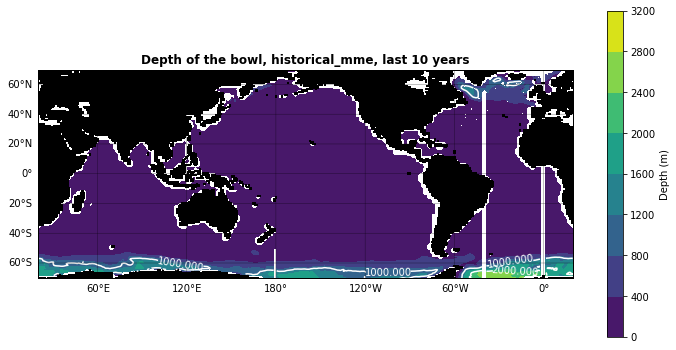

In [32]:
fig = plt.figure(figsize=(12,6))
#ax = fig.add_axes([0.05,0.05,0.95,0.9])
# Create meshgrid
lon2d, lat2d = np.meshgrid(lon, lat)
# Read grid for coloring continents
f2 = open_ncfile('/home/ysilvy/Density_bining/Yona_analysis/data/140807_WOD13_masks.nc', 'r')
landsea = f2.variables['landsea'][:]
# Create mask
sea_mask = landsea != 1
landsea = np.ma.array(landsea, mask=sea_mask)
landsea[landsea == 1] = 0.2
# Basemap
map = Basemap(projection='cyl', llcrnrlon=20, llcrnrlat=-70., urcrnrlon=380, urcrnrlat=70)
map.drawmapboundary(fill_color='1')
map.drawparallels(np.arange(-60, 61, 20.), labels=[1, 0, 1, 0], linewidth=0.5)
map.drawmeridians(np.arange(-180, 180, 60), labels=[0, 0, 0, 1], linewidth=0.5)

cf = map.contourf(lon2d, lat2d, ptopdepth, latlon=True)
ct = map.contour(lon2d,lat2d, ptopdepth,levels=[1000,2000,3000],colors='white',latlon=True)
plt.clabel(ct)
# Draw continents
map.pcolormesh(lon2d, lat2d, landsea, shading='flat', cmap=plt.cm.gray,latlon=True)

cb=plt.colorbar(cf)
cb.set_label('Depth (m)')
plt.title('Depth of the bowl, historical_mme, last 10 years', fontweight='bold')

In [21]:
ptopdepth.shape

(180, 360)

In [18]:
lat

array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5,
       -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5,
       -71.5, -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5,
       -62.5, -61.5, -60.5, -59.5, -58.5, -57.5, -56.5, -55.5, -54.5,
       -53.5, -52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5, -45.5,
       -44.5, -43.5, -42.5, -41.5, -40.5, -39.5, -38.5, -37.5, -36.5,
       -35.5, -34.5, -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5,
       -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5,
       -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,
        -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,

In [19]:
lon

array([-179.5, -178.5, -177.5, -176.5, -175.5, -174.5, -173.5, -172.5,
       -171.5, -170.5, -169.5, -168.5, -167.5, -166.5, -165.5, -164.5,
       -163.5, -162.5, -161.5, -160.5, -159.5, -158.5, -157.5, -156.5,
       -155.5, -154.5, -153.5, -152.5, -151.5, -150.5, -149.5, -148.5,
       -147.5, -146.5, -145.5, -144.5, -143.5, -142.5, -141.5, -140.5,
       -139.5, -138.5, -137.5, -136.5, -135.5, -134.5, -133.5, -132.5,
       -131.5, -130.5, -129.5, -128.5, -127.5, -126.5, -125.5, -124.5,
       -123.5, -122.5, -121.5, -120.5, -119.5, -118.5, -117.5, -116.5,
       -115.5, -114.5, -113.5, -112.5, -111.5, -110.5, -109.5, -108.5,
       -107.5, -106.5, -105.5, -104.5, -103.5, -102.5, -101.5, -100.5,
        -99.5,  -98.5,  -97.5,  -96.5,  -95.5,  -94.5,  -93.5,  -92.5,
        -91.5,  -90.5,  -89.5,  -88.5,  -87.5,  -86.5,  -85.5,  -84.5,
        -83.5,  -82.5,  -81.5,  -80.5,  -79.5,  -78.5,  -77.5,  -76.5,
        -75.5,  -74.5,  -73.5,  -72.5,  -71.5,  -70.5,  -69.5,  -68.5,
      